In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.size']=14

#importando os dados
df = pd.read_csv('data_for_exercises/XRD_Rietveld.csv')

In [3]:
df.head()

,x,y_obs,weight,y_calc,y_bkg,phase 1,phase 2
0,16.000,1163,0.00086,1154.562,1154.542,22.08458,42.58835
1,16.017,1092,0.00092,1154.543,1154.523,36.45257,49.58540
2,16.034,1079,0.00093,1154.524,1154.504,43.03132,72.74458
3,16.051,1107,0.00090,1154.505,1154.485,45.04714,88.11629
4,16.068,1103,0.00091,1154.487,1154.466,52.50438,93.15568


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


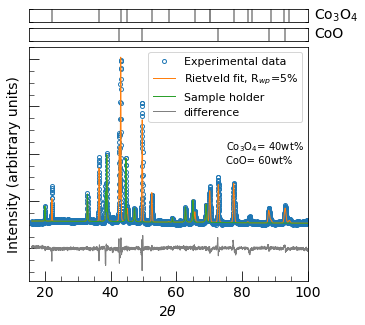

In [22]:
#pegando dados coluna a coluna do csv 
x_data = df['x'].dropna() #dropna para tirar valores missings
y_obs = df['y_obs'].dropna()
y_fit = df['y_calc'].dropna()
y_bkg = df['y_bkg'].dropna()
hkl1 = df['phase 1'].dropna()
hkl2 = df['phase 2'].dropna()

#limite do eixo x 
xmin = 15
xmax = 100

#preparandoas figuras e paineis
fig = plt.figure(1,figsize=(5,5))
gs = gridspec.GridSpec(15,1)
gs.update(wspace=0.25, hspace=0.45)

#gerando a figura principal
xtr_subsplot = fig.add_subplot(gs[2:15,0:1]) #usando da linha 2 a 15 e a unica coluna criada
plt.plot(x_data, y_obs, label='Experimental data', linestyle='none', marker='o', mfc='none', markersize=4)
plt.plot(x_data, y_fit, label='Rietveld fit, R$_{wp}$=5%', linestyle='-', linewidth=1)
plt.plot(x_data, y_bkg, label='Sample holder', linestyle='-', linewidth=1)
plt.plot(x_data, y_fit-y_obs, label='difference', linestyle='-',color='grey', linewidth=1)

#Ticks e Labels
plt.tick_params(direction='in',right=True, top=True)
plt.tick_params(labelbottom=True, labeltop=False, labelright=False, labelleft=False)    
xticks = np.arange(0, 101, 20)
yticks = np.arange(0,10000,2000)
plt.minorticks_on()

plt.tick_params(direction='in',which='minor', length=5, bottom=True, top=False, left=True, right=False)
plt.tick_params(direction='in',which='major', length=10, bottom=True, top=False, left=True, right=False)
plt.xticks(xticks)
plt.yticks(yticks)

plt.xlabel('2$\\theta$') 
plt.ylabel('Intensity (arbitrary units)')  

plt.legend(fontsize=11)
plt.xlim(xmin,xmax)

#frações de fase
plt.text(75,4200,'Co$_3$O$_4$= 40wt%', fontsize=10)
plt.text(75,3600,'CoO= 60wt%', fontsize=10)

#HKL para a fase 1 e suas edições
xtr_subsplot = fig.add_subplot(gs[0:1,0:1])
for xc in hkl1.values:
    plt.axvline(x=xc,color='grey')
    
plt.tick_params(direction='in',bottom=False, right=True, top=False)
plt.tick_params(labelleft=False, labelbottom=False)
plt.xlim(xmin,xmax)
plt.text(102,0.3,'Co$_3$O$_4$')

#HKL para a fase 2
xtr_subsplot = fig.add_subplot(gs[1:2,0:1])
for xc in hkl2.values:
    plt.axvline(x=xc,color='grey') #plota uma linha vertical para todos os valores de HKL

plt.tick_params(direction='in',bottom=False, right=True, top=False)
plt.tick_params(labelleft=False, labelbottom=False)
plt.xlim(xmin,xmax)
plt.text(102,0.3,'CoO')

#salvando em boa qualidade
plt.savefig('data_for_exercises/plotting/plot_xrd_refinement.eps', dpi=300,bbox_inches="tight")